In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications.vgg16 import VGG16

In [ ]:
data = pd.read_csv('regresi_kotak.csv')
data.head()

,file,x1,y1,x2,y2
0,0.jpg,0,0,80,103
1,1.jpg,22,0,196,97
2,2.jpg,176,120,194,138
3,3.jpg,161,0,199,54
4,4.jpg,26,0,199,120


In [ ]:
!unzip '/content/regresi_kotak.zip'

Archive:  /content/regresi_kotak.zip
  inflating: ini/0.jpg               
  inflating: ini/100.jpg             
  inflating: ini/101.jpg             
  inflating: ini/102.jpg             
  inflating: ini/103.jpg             
  inflating: ini/104.jpg             
  inflating: ini/105.jpg             
  inflating: ini/106.jpg             
  inflating: ini/107.jpg             
  inflating: ini/108.jpg             
  inflating: ini/109.jpg             
  inflating: ini/10.jpg              
  inflating: ini/110.jpg             
  inflating: ini/111.jpg             
  inflating: ini/112.jpg             
  inflating: ini/113.jpg             
  inflating: ini/114.jpg             
  inflating: ini/115.jpg             
  inflating: ini/116.jpg             
  inflating: ini/117.jpg             
  inflating: ini/118.jpg             
  inflating: ini/119.jpg             
  inflating: ini/11.jpg              
  inflating: ini/120.jpg             
  inflating: ini/121.jpg             
  inflating: 

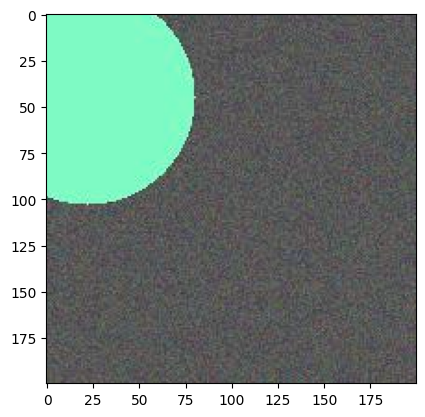

In [ ]:
plt.imshow(cv2.imread('ini/0.jpg'))

0,0 = koordinat kiri atas

80,103 = koordinat kanan bawah

255 = warna

5 = ketebalan kotakan

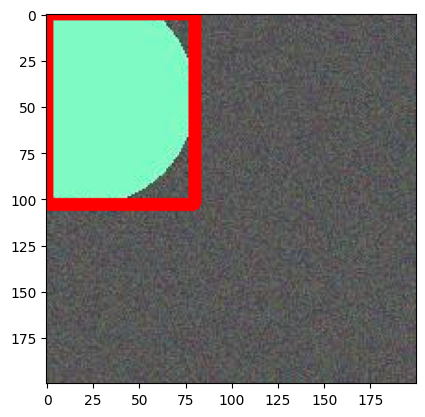

In [ ]:
gambar = cv2.imread('ini/0.jpg')
ini = cv2.rectangle(gambar, (0,0),(80,103),(255,0,0),5)
plt.imshow(ini)

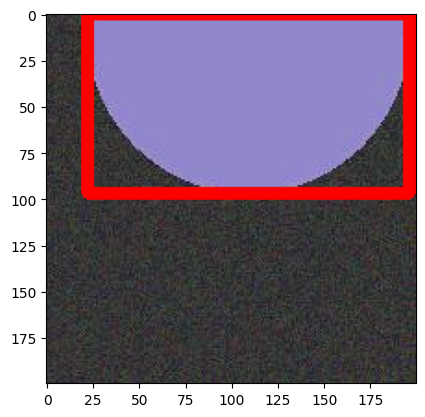

In [ ]:
gambar = cv2.imread('ini/1.jpg')
ini = cv2.rectangle(gambar, (22,0),(196,97),(255,0,0),5)
plt.imshow(ini)

In [ ]:
gambar.shape

(200, 200, 3)

In [ ]:
x = []
y = data.values[:,1:]/200
y = y.astype(float)

for info in data.values:
  gambar = cv2.imread('ini/'+info[0])
  gambar = cv2.cvtColor(gambar, cv2.COLOR_BGR2RGB)/255
  x.append(gambar)
x = np.asarray(x).astype(float)

In [ ]:
baseline = VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = (200,200,3)
)

baseline.trainable = False

_ = Flatten()(baseline.output)
_ = Dense(128, activation = 'relu')(_)
_ = Dense(16, activation = 'relu') (_)
_ = Dense(4, activation = 'linear')(_)

model = Model(inputs = baseline.input, outputs = _)

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
history = model.fit(x, y, batch_size = 1, epochs = 20, validation_split = 0.1)

Epoch 1/20
450/450 [==============================] - 16s 12ms/step - loss: 0.2565 - val_loss: 0.1515
Epoch 2/20
450/450 [==============================] - 4s 10ms/step - loss: 0.1044 - val_loss: 0.0886
Epoch 3/20
450/450 [==============================] - 5s 10ms/step - loss: 0.0718 - val_loss: 0.0793
Epoch 4/20
450/450 [==============================] - 4s 10ms/step - loss: 0.0670 - val_loss: 0.0790
Epoch 5/20
450/450 [==============================] - 5s 10ms/step - loss: 0.0665 - val_loss: 0.0793
Epoch 6/20
450/450 [==============================] - 5s 11ms/step - loss: 0.0665 - val_loss: 0.0791
Epoch 7/20
450/450 [==============================] - 4s 10ms/step - loss: 0.0665 - val_loss: 0.0790
Epoch 8/20
450/450 [==============================] - 4s 10ms/step - loss: 0.0665 - val_loss: 0.0791
Epoch 9/20
450/450 [==============================] - 5s 11ms/step - loss: 0.0665 - val_loss: 0.0790
Epoch 10/20
450/450 [==============================] - 4s 10ms/step - loss: 0.0665 - val_l

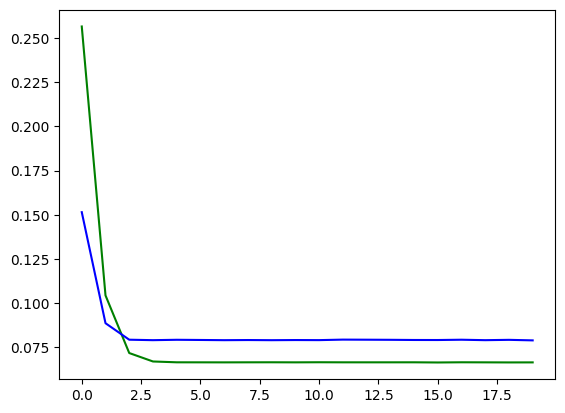

In [ ]:
y1 = history.history['loss']
y2 = history.history['val_loss']
plt.plot(range(len(y1)), y1, 'g',
         range(len(y2)), y2, 'b')

plt.show()

In [ ]:
x_test = []
x_test.append(x[4])
x_test = np.array(x_test)
y_pred = model.predict(x_test)
y_pred = (y_pred*200).astype(int)
y_pred

1/1 [==============================] - 0s 278ms/step


array([[ 57,  59, 144, 147]])

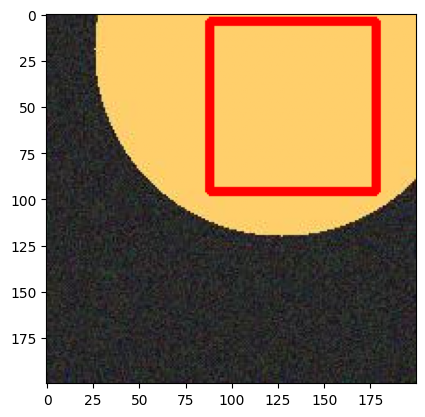

In [ ]:
gambar = x[4].copy()
gambar = cv2.rectangle(gambar, (88,4), (178,96), (255,0,0), 4)
plt.imshow(gambar)